Pearson Correlation Coefficient: 0.1047
P-value: 0.8051
Linear Regression: CKD_Prevalence = 0.3036 * Salt_Intake + 6.6774
R-squared: 0.0110


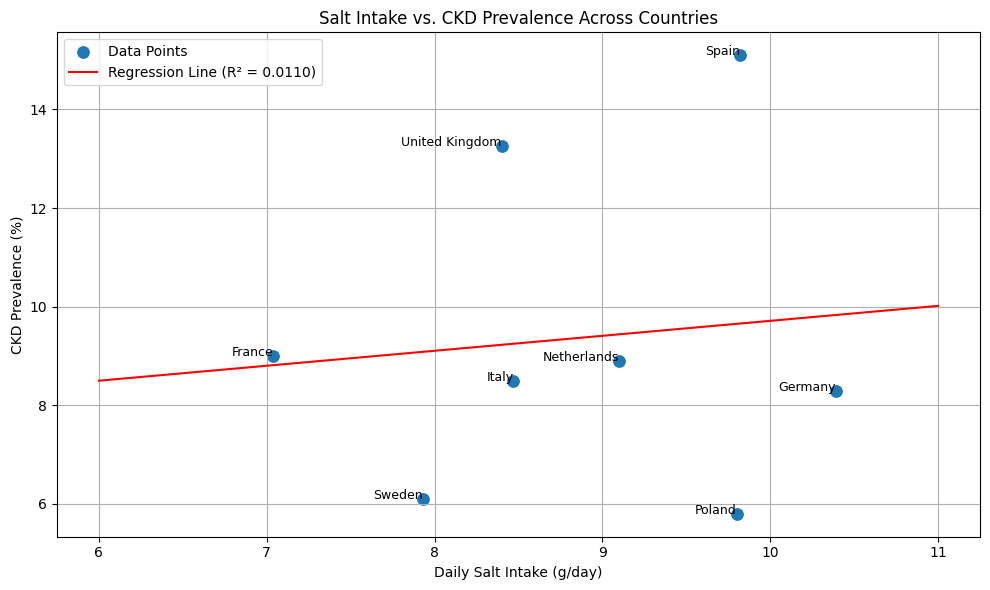

Predicted CKD Prevalence for 7.0 g/day salt intake: 8.80%
Predicted CKD Prevalence for 9.0 g/day salt intake: 9.41%
Predicted CKD Prevalence for 11.0 g/day salt intake: 10.02%


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Data from the provided table
data = {
    'Country': ['France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Spain', 'Sweden', 'United Kingdom'],
    'Salt_Intake_g_per_day': [7.04, 10.39, 8.47, 9.10, 9.80, 9.82, 7.93, 8.40],
    'CKD_Prevalence_percent': [9.0, 8.3, 8.5, 8.9, 5.8, 15.1, 6.11, 13.25]  # Midpoint used for ranges
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['Salt_Intake_g_per_day'], df['CKD_Prevalence_percent'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# 2. Linear Regression for Probability Analytics
X = df['Salt_Intake_g_per_day'].values.reshape(-1, 1)  # Independent variable (salt intake)
y = df['CKD_Prevalence_percent'].values  # Dependent variable (CKD prevalence)
model = LinearRegression()
model.fit(X, y)

# Regression parameters
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression: CKD_Prevalence = {slope:.4f} * Salt_Intake + {intercept:.4f}")

# Predict CKD prevalence for a range of salt intakes
salt_range = np.linspace(6, 11, 100).reshape(-1, 1)
ckd_predicted = model.predict(salt_range)

# Calculate R-squared
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# 3. Plotting
plt.figure(figsize=(10, 6))
# Scatter plot with regression line
sns.scatterplot(x='Salt_Intake_g_per_day', y='CKD_Prevalence_percent', data=df, s=100, label='Data Points')
plt.plot(salt_range, ckd_predicted, color='red', label=f'Regression Line (R² = {r_squared:.4f})')

# Annotate points with country names
for i, country in enumerate(df['Country']):
    plt.annotate(country, (df['Salt_Intake_g_per_day'][i], df['CKD_Prevalence_percent'][i]), fontsize=9, ha='right')

plt.title('Salt Intake vs. CKD Prevalence Across Countries')
plt.xlabel('Daily Salt Intake (g/day)')
plt.ylabel('CKD Prevalence (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig('salt_ckd_correlation.png')
plt.show()

# 4. Probability Analytics: Predict CKD prevalence for specific salt intake
def predict_ckd(salt_intake):
    return model.predict([[salt_intake]])[0]

# Example predictions
salt_test = [7.0, 9.0, 11.0]
for salt in salt_test:
    ckd_prob = predict_ckd(salt)
    print(f"Predicted CKD Prevalence for {salt} g/day salt intake: {ckd_prob:.2f}%")